In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import TFBertModel

custom_objects = {'TFBertModel': TFBertModel}

# Load the model with the custom object scope
model = load_model('bert_pooling.h5', custom_objects=custom_objects)
# tf.saved_model.save(model, '/models/bert_pooling_avg')

2024-08-11 01:08:17.012755: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-08-11 01:08:17.012777: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-08-11 01:08:17.012783: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-08-11 01:08:17.012797: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-11 01:08:17.012811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


ValueError: Exception encountered when calling layer 'tf_bert_model' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for input_ids.

Call arguments received by layer 'tf_bert_model' (type TFBertModel):
  • input_ids=['<KerasTensor shape=(None, 400), dtype=int32, sparse=False, name=input_ids>', '<KerasTensor shape=(None, 400), dtype=int32, sparse=False, name=attention_mask>']
  • attention_mask=None
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# Load the model from the .h5 file
model = load_model('bert_pooling.h5')

# Plot the model and save it as an image file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


2.17.0


ValueError: Unknown layer: 'TFBertModel'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

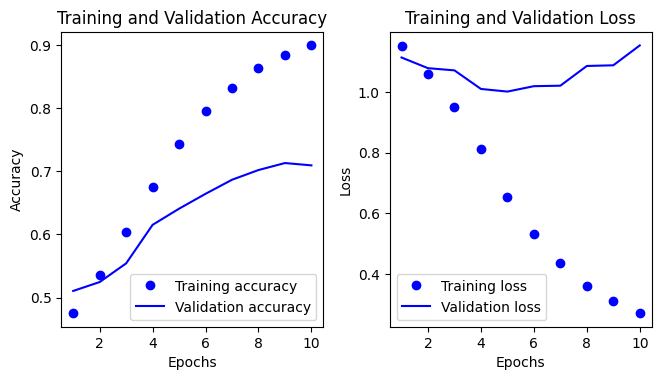

In [8]:
import matplotlib.pyplot as plt

# Assuming you have the following data from training
history_dict = {
    'accuracy': [0.4750, 0.5365, 0.6044, 0.6746, 0.7429, 0.7961, 0.8324, 0.8633, 0.8841, 0.8998],
    'val_accuracy': [0.5105, 0.5246, 0.5542, 0.6153, 0.6409, 0.6645, 0.6868, 0.7022, 0.7133, 0.7096],
    'loss': [1.1518, 1.0597, 0.9520, 0.8127, 0.6554, 0.5307, 0.4359, 0.3603, 0.3097, 0.2706],
    'val_loss': [1.1135, 1.0783, 1.0711, 1.0099, 1.0012, 1.0190, 1.0206, 1.0856, 1.0878, 1.1533]
}

epochs = range(1, len(history_dict['loss']) + 1)

# Metrics to plot
metrics_names = ["accuracy", "loss"]

plt.figure(figsize=(10, 7))

for i, metric in enumerate(metrics_names, 1):
    plt.subplot(2, 3, i)
    plt.plot(epochs, history_dict[metric], 'bo', label=f'Training {metric}')
    plt.plot(epochs, history_dict[f'val_{metric}'], 'b-', label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

plt.tight_layout()
plt.show()


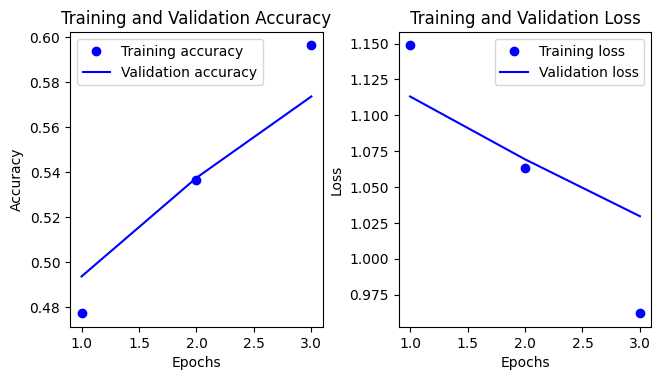

In [10]:
import matplotlib.pyplot as plt

# Updated data from the provided training log
history_dict = {
    'accuracy': [0.4771, 0.5365, 0.5963],
    'val_accuracy': [0.4935, 0.5374, 0.5736],
    'loss': [1.1487, 1.0635, 0.9619],
    'val_loss': [1.1131, 1.0693, 1.0296]
}

epochs = range(1, len(history_dict['loss']) + 1)

# Metrics to plot
metrics_names = ["accuracy", "loss"]

plt.figure(figsize=(10, 7))

for i, metric in enumerate(metrics_names, 1):
    plt.subplot(2, 3, i)
    plt.plot(epochs, history_dict[metric], 'bo', label=f'Training {metric}')
    plt.plot(epochs, history_dict[f'val_{metric}'], 'b-', label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

plt.tight_layout()
plt.show()


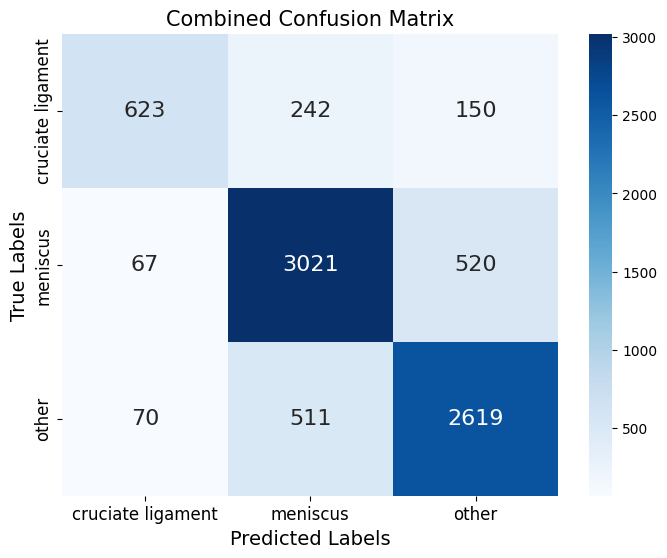

In [23]:
# Injury
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion

# Example confusion matrix from the image (adapt this with your actual data)
confusion = np.array([
    [66, 11, 3, 12, 25],  # cruciate-ligament-minor
    [4, 542, 13, 108, 125],  # cruciate-ligament-urgent
    [2, 7, 360, 116, 65],  # meniscus-minor
    [6, 52, 82, 2463, 455],  # meniscus-urgent
    [12, 58, 69, 442, 2619],  # other-minor
])

# Combine the original 5x5 confusion matrix into a 3x3 matrix
combined_confusion = np.array([
    [confusion[0][0] + confusion[1][1] + confusion[1][0] + confusion[0][1], confusion[1][2] + confusion[1][3] + confusion[1][2] + confusion[1][3], confusion[0][4] + confusion[1][4]],  # cruciate ligament
    [confusion[2][0] + confusion[3][0] + confusion[2][1] + confusion[3][1], confusion[2][2] + confusion[3][2] + confusion[2][3] + confusion[3][3], confusion[2][4] + confusion[3][4]],  # meniscus
    [confusion[4][0] + confusion[4][1], confusion[4][2] + confusion[4][3], confusion[4][4]],  # other
])

# Renaming the labels
labels = ["cruciate ligament", "meniscus", "other"]

# Plotting the new confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
plt.title('Combined Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


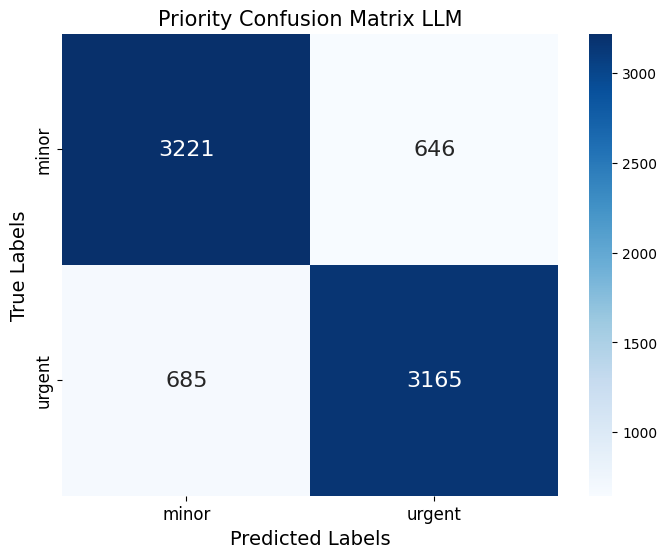

In [60]:
# risk level
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrix from the image (adapt this with your actual data)
confusion = np.array([
    [66, 11, 3, 12, 25],  # cruciate-ligament-minor
    [4, 542, 13, 108, 125],  # cruciate-ligament-urgent
    [2, 7, 360, 116, 65],  # meniscus-minor
    [6, 52, 82, 2463, 455],  # meniscus-urgent
    [12, 58, 69, 442, 2619],  # other-minor
])

# Combine the original 5x5 confusion matrix into a 3x3 matrix
combined_confusion = np.array([
    [
    (confusion[0][0] + confusion[0][2] + confusion[0][4] +
     confusion[2][0] + confusion[2][2] + confusion[2][4] +
     confusion[4][0] + confusion[4][2] + confusion[4][4]), 
    (confusion[0][1] + confusion[0][3] + confusion[2][1] +
     confusion[2][3] + confusion[4][1] + confusion[4][3])
    ],
    [
    (confusion[1][0] + confusion[1][2] + confusion[1][4] +
     confusion[3][0] + confusion[3][2] + confusion[3][4]),
     (confusion[1][1] + confusion[1][3] + confusion[3][1] +
     confusion[3][3])
    ]
])

# Renaming the labels
labels = ["minor", "urgent"]

# Plotting the new confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
plt.title('Priority Confusion Matrix LLM', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [61]:
import pandas as pd
model_name = "llm-priority"
array_2x2 = combined_confusion
total_samples = np.sum(array_2x2)
# Compute CR (sum of the diagonal divided by total samples)
CR = (array_2x2[0][0] + array_2x2[1][1]) / total_samples

# Compute OR (upper right corner divided by total samples)
OR = array_2x2[0][1] / total_samples

# Compute UR (bottom left corner divided by total samples)
UR = array_2x2[1][0] / total_samples

# Compute Priority
Priority = CR + 0.5 * OR - 0.5 * UR

# Create DataFrame
data = {
    "model": [model_name],
    "$CR$": [CR],
    "$OR$": [OR],
    "$UR$": [UR],
    "$Priority$": [Priority]
}

df_2 = pd.DataFrame(data)
df_2

,model,CR,OR,UR,Priority
0,llm-priority,0.827524,0.083711,0.088765,0.824997


[[  63   20    0   15   19]
 [   0  579    7  106  100]
 [   0   21  336  117   76]
 [   1  113   31 2525  388]
 [   0  151   17  539 2493]]


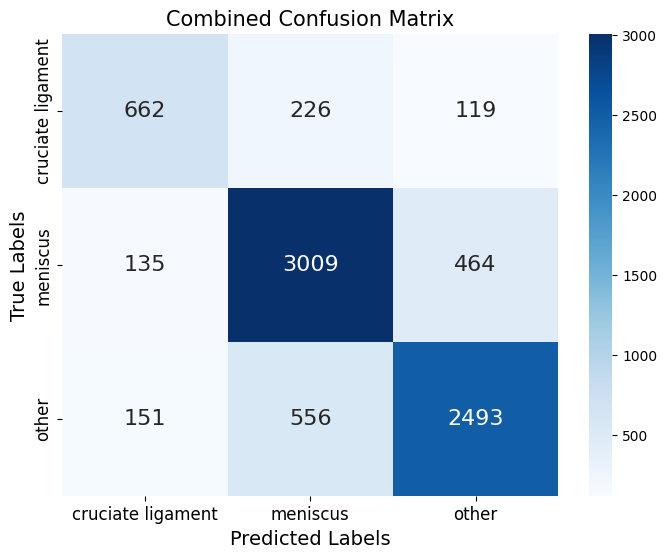

In [32]:
# Combine the original 5x5 confusion matrix into a 3x3 matrix
import numpy as np

# Create a confusion matrix based on the values extracted from the image
confusion = np.array([
    [63, 20,  0,  15, 19],  # cruciate-ligament-minor
    [0, 579, 7, 106, 100],  # cruciate-ligament-urgent
    [0, 21, 336, 117, 76],  # meniscus-minor
    [1, 113, 31, 2525, 388],  # meniscus-urgent
    [0, 151, 17, 539, 2493]  # other-minor
])

print(confusion)


combined_confusion = np.array([
    [confusion[0][0] + confusion[1][1] + confusion[1][0] + confusion[0][1], confusion[1][2] + confusion[1][3] + confusion[1][2] + confusion[1][3], confusion[0][4] + confusion[1][4]],  # cruciate ligament
    [confusion[2][0] + confusion[3][0] + confusion[2][1] + confusion[3][1], confusion[2][2] + confusion[3][2] + confusion[2][3] + confusion[3][3], confusion[2][4] + confusion[3][4]],  # meniscus
    [confusion[4][0] + confusion[4][1], confusion[4][2] + confusion[4][3], confusion[4][4]],  # other
])

# Renaming the labels
labels = ["cruciate ligament", "meniscus", "other"]

# Plotting the new confusion matrix
# Increase the font size of the inner numbers (annotations)
plt.figure(figsize=(8, 6))
sns.heatmap(combined_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
plt.title('Combined Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


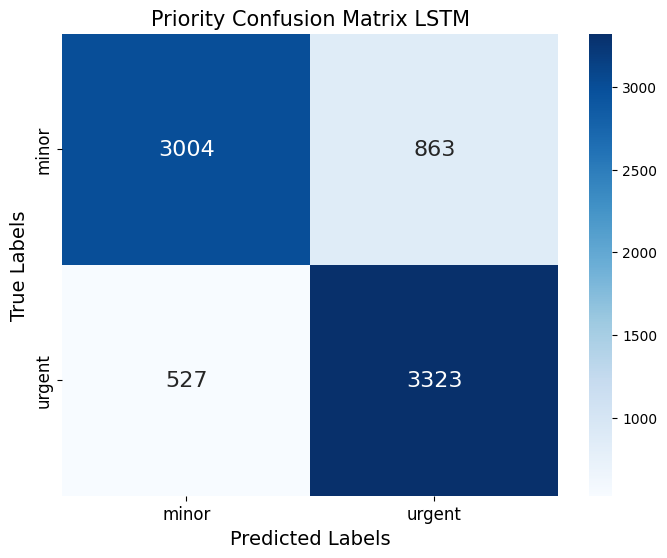

In [58]:
# Combine the original 5x5 confusion matrix into a 3x3 matrix
import numpy as np

# Create a confusion matrix based on the values extracted from the image
confusion = np.array([
    [63, 20,  0,  15, 19],  # cruciate-ligament-minor
    [0, 579, 7, 106, 100],  # cruciate-ligament-urgent
    [0, 21, 336, 117, 76],  # meniscus-minor
    [1, 113, 31, 2525, 388],  # meniscus-urgent
    [0, 151, 17, 539, 2493]  # other-minor
])


combined_confusion = np.array([
    [
    (confusion[0][0] + confusion[0][2] + confusion[0][4] +
     confusion[2][0] + confusion[2][2] + confusion[2][4] +
     confusion[4][0] + confusion[4][2] + confusion[4][4]), 
    (confusion[0][1] + confusion[0][3] + confusion[2][1] +
     confusion[2][3] + confusion[4][1] + confusion[4][3])
    ],
    [
    (confusion[1][0] + confusion[1][2] + confusion[1][4] +
     confusion[3][0] + confusion[3][2] + confusion[3][4]),
     (confusion[1][1] + confusion[1][3] + confusion[3][1] +
     confusion[3][3])
    ]
])

# Renaming the labels
labels = ["minor", "urgent"]

# Plotting the new confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
plt.title('Priority Confusion Matrix LSTM', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [59]:
import pandas as pd
model_name = "lstm-priority"
array_2x2 = combined_confusion
total_samples = np.sum(array_2x2)
# Compute CR (sum of the diagonal divided by total samples)
CR = (array_2x2[0][0] + array_2x2[1][1]) / total_samples

# Compute OR (upper right corner divided by total samples)
OR = array_2x2[0][1] / total_samples

# Compute UR (bottom left corner divided by total samples)
UR = array_2x2[1][0] / total_samples

# Compute Priority
Priority = CR + 0.5 * OR - 0.5 * UR

# Create DataFrame
data = {
    "model": [model_name],
    "$CR$": [CR],
    "$OR$": [OR],
    "$UR$": [UR],
    "$Priority$": [Priority]
}

df = pd.DataFrame(data)
df

,model,$CR$,$OR$,$UR$,$Priority$
0,lstm-priority,0.819878,0.111831,0.068291,0.841648


In [62]:
df_all = pd.concat([df_2, df]).round(2)
df_all
df_all.to_csv("risk.csv", index=False)

In [63]:
df_all

,model,CR,OR,UR,Priority,$CR$,$OR$,$UR$,$Priority$
0,llm-priority,0.83,0.08,0.09,0.82,NaN,NaN,NaN,NaN
0,lstm-priority,NaN,NaN,NaN,NaN,0.82,0.11,0.07,0.84
